In [26]:
import MetaTrader5 as mt
import pandas as pd
import plotly.express as px
from datetime import datetime

In [187]:
import pandas as pd
df1 = pd.read_csv("EURUSD_Candlestick_1_M_BID_02.01.2023-14.01.2023.csv")
df1.tail()

,Gmt time,Open,High,Low,Close,Volume
18715,14.01.2023 23:55:00.000,1.08302,1.08302,1.08302,1.08302,0.0
18716,14.01.2023 23:56:00.000,1.08302,1.08302,1.08302,1.08302,0.0
18717,14.01.2023 23:57:00.000,1.08302,1.08302,1.08302,1.08302,0.0
18718,14.01.2023 23:58:00.000,1.08302,1.08302,1.08302,1.08302,0.0
18719,14.01.2023 23:59:00.000,1.08302,1.08302,1.08302,1.08302,0.0


In [188]:
#Check if any zero volumes are available
indexZeros = df1[ df1['Volume'] == 0 ].index

df1.drop(indexZeros , inplace=True)
df1.loc[(df1["Volume"] == 0 )]
df1.isna().sum()

Gmt time    0
Open        0
High        0
Low         0
Close       0
Volume      0
dtype: int64

In [189]:
import numpy as np
import pandas_ta as ta #DEDICATED FOR TRADING
#df.ta.indicators()
#help(ta.atr)
df1['ATR'] = df1.ta.atr(length=20)
df1['RSI'] = df1.ta.rsi()
df1['Average'] = df1.ta.midprice(length=1) #midprice
df1['MA10'] = df1.ta.sma(length=10)
df1['MA40'] = df1.ta.sma(length=40)
df1['MA80'] = df1.ta.sma(length=80)
df1['MA160'] = df1.ta.sma(length=160)

from scipy.stats import linregress
def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
backrollingN = 6
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
df1['slopeMA10'] = df1['MA10'].rolling(window=backrollingN).apply(get_slope, raw=True)
df1['slopeMA40'] = df1['MA40'].rolling(window=backrollingN).apply(get_slope, raw=True)
df1['slopeMA80'] = df1['MA80'].rolling(window=backrollingN).apply(get_slope, raw=True)
df1['slopeMA160'] = df1['MA160'].rolling(window=backrollingN).apply(get_slope, raw=True)
df1['AverageSlope'] = df1['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
df1['RSISlope'] = df1['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)

In [190]:
df1.tail()

,Gmt time,Open,High,Low,Close,Volume,ATR,RSI,Average,MA10,MA40,MA80,MA160,slopeMA10,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope
17155,13.01.2023 21:55:00.000,1.08323,1.08330,1.08323,1.08330,3.300800e+08,0.000078,63.321387,1.083265,1.083153,1.083148,1.083158,1.08306,0.000016,0.000003,0.000003,-3.125000e-07,0.000033,1.779870
17156,13.01.2023 21:56:00.000,1.08329,1.08339,1.08328,1.08333,2.655200e+08,0.000080,65.042567,1.083335,1.083181,1.083152,1.083162,1.08306,0.000020,0.000003,0.000003,-3.017857e-07,0.000035,1.582756
17157,13.01.2023 21:57:00.000,1.08329,1.08332,1.08315,1.08319,4.456000e+08,0.000085,52.630540,1.083235,1.083196,1.083154,1.083163,1.08306,0.000021,0.000003,0.000003,-2.785714e-07,0.000018,-0.519065
17158,13.01.2023 21:58:00.000,1.08318,1.08325,1.08317,1.08319,2.945000e+08,0.000085,52.630540,1.083210,1.083208,1.083154,1.083164,1.08306,0.000021,0.000002,0.000002,-1.232143e-07,0.000006,-1.668780
17159,13.01.2023 21:59:00.000,1.08318,1.08328,1.08292,1.08302,1.260000e+08,0.000098,41.482466,1.083100,1.083204,1.083149,1.083163,1.08306,0.000016,0.000001,0.000002,1.142857e-07,-0.000027,-3.765105


In [191]:
from sklearn.impute import SimpleImputer  

df_num = df1.drop("Gmt time", axis = 1)                                                     # older version: from sklearn.preprocessing import Imputer // imputer = Imputer(strategy="median")
imputer = SimpleImputer(strategy="median")

imputer.fit(df_num)

imputer.statistics_

X = imputer.transform(df_num)

df = pd.DataFrame(X, columns=df_num.columns)

df.head()

,Open,High,Low,Close,Volume,ATR,RSI,Average,MA10,MA40,MA80,MA160,slopeMA10,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope
0,1.07007,1.07009,1.06998,1.07001,8.694000e+07,0.000181,50.481926,1.070035,1.068241,1.068214,1.068204,1.068155,0.000001,8.714286e-07,6.089286e-07,0.000001,1.428571e-07,-1.015061e-15
1,1.06998,1.07026,1.06998,1.07026,2.898000e+07,0.000181,50.481926,1.070120,1.068241,1.068214,1.068204,1.068155,0.000001,8.714286e-07,6.089286e-07,0.000001,1.428571e-07,-1.015061e-15
2,1.06998,1.07033,1.06998,1.07004,3.726000e+07,0.000181,50.481926,1.070155,1.068241,1.068214,1.068204,1.068155,0.000001,8.714286e-07,6.089286e-07,0.000001,1.428571e-07,-1.015061e-15
3,1.06998,1.07011,1.06998,1.06998,2.484000e+07,0.000181,50.481926,1.070045,1.068241,1.068214,1.068204,1.068155,0.000001,8.714286e-07,6.089286e-07,0.000001,1.428571e-07,-1.015061e-15
4,1.07003,1.07034,1.06999,1.07005,4.968000e+07,0.000181,50.481926,1.070165,1.068241,1.068214,1.068204,1.068155,0.000001,8.714286e-07,6.089286e-07,0.000001,1.428571e-07,-1.015061e-15


In [1]:
#Target flexible way
pip = df.ta.atr(length=14)
pipdiff = 21*1e-5 #for TP
SLTPRatio = 2 #pipdiff/Ratio gives SL


def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    ma_small = list(df1['MA10'])
    ma_big = list(df1['MA40'])
    trendcat = [None] * length
   
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)
            
            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                  if ma_small[line+1] < ma_big[line+1] and high[line+1] < ma_big[line+1]:
                    trendcat[line] = 1 #-1 downtrend
                    break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                  if ma_small[line+1] > ma_big[line+1] and high[line+1] > ma_big[line+1]:
                    trendcat[line] = 2 # uptrend
                    break
            else:
                trendcat[line] = 0 # no clear trend

            #if ( (valueOpenLow >= pip[line+1]) and (-valueOpenHigh <= (pip[line+1]/SLTPRatio)) ):
             #   if ma_small[line+1] < ma_big[line+1] and high[line+1] < ma_big[line+1]:
              #      trendcat[line] = 1 #-1 downtrend
               #     break
           
             #elif ( (valueOpenLow <= (pip[line+1]/SLTPRatio)) and (-valueOpenHigh >= pip[line+1]) ):
             #    if ma_small[line+1] > ma_big[line+1] and high[line+1] > ma_big[line+1]:
                     #trendcat[line] = 2 # uptrend
               #     break
            #else:
             #   trendcat[line] = 0 # no clear trend'''
           
            
    return trendcat

NameError: name 'df' is not defined

In [ ]:
df['mytarget'] = mytarget(15, df)
df

C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\532070288.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_model.hist(ax = ax)


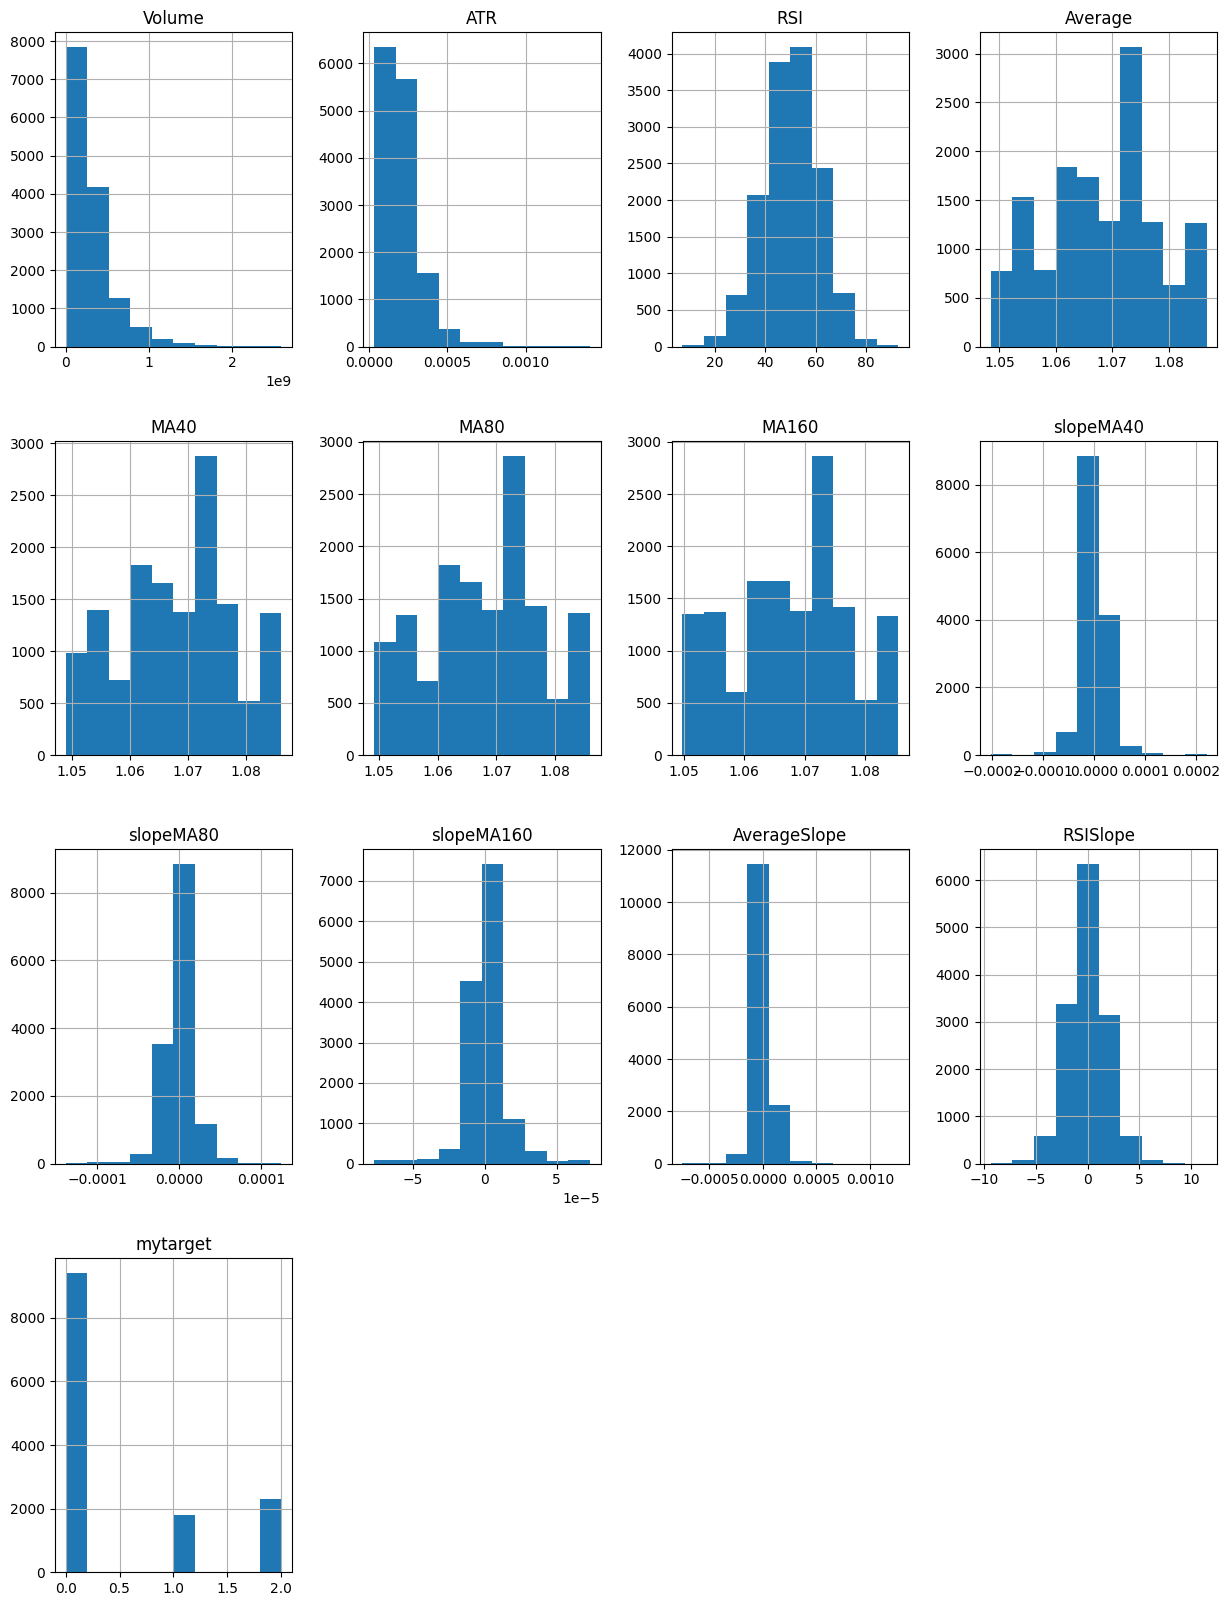

In [204]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_model= df[['Volume', 'ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope', 'mytarget']] 
df_model.hist(ax = ax)
plt.show()

In [205]:
df_model=df_model.dropna()

attributes=['ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope']
X = df_model[attributes]
y = df_model["mytarget"]

print(y)

0        2.0
1        2.0
2        2.0
3        2.0
4        0.0
        ... 
14176    0.0
14177    0.0
14178    0.0
14179    0.0
14180    0.0
Name: mytarget, Length: 13501, dtype: float64


In [206]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [207]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#log_clf = LogisticRegression()  ('lr', log_clf),
xgb_clf = XGBClassifier()
rnd_clf = RandomForestClassifier(n_estimators=300)
svm_clf = SVC( probability=True )
kn_clf = KNeighborsClassifier(n_neighbors=25, n_jobs=1)

model1 = VotingClassifier(
 estimators=[ ('rf', rnd_clf), ('svc', svm_clf), ('kn', kn_clf), ('xg', xgb_clf)],
 voting='soft'
 )
model1.fit(X_train, y_train)
'''
model = KNeighborsClassifier(n_neighbors=200, weights='uniform', algorithm='kd_tree', leaf_size=30, p=1, metric='minkowski', metric_params=None, n_jobs=1)
model.fit(X_train, y_train)'''

y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)

In [208]:
from sklearn.metrics import accuracy_score


accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))

#------------------------------------------------------------------
#--- How should I compare my accuracy ?
print(df_model['mytarget'].value_counts()*100/df_model['mytarget'].count())

# Random Model, gambler?
pred_test = np.random.choice([0, 1, 2], len(y_pred_test))
accuracy_test = accuracy_score(y_test, pred_test)
print("Accuracy Gambler: %.2f%%" % (accuracy_test * 100.0))

Accuracy train: 83.66%
Accuracy test: 71.94%
0.0    69.661507
2.0    17.117251
1.0    13.221243
Name: mytarget, dtype: float64
Accuracy Gambler: 32.95%


In [91]:
mt.initialize()

True

In [93]:
#this line of code is to connect the logger account 

'''login = 51087954       # 9441330
password = 'qC6Dy42a'          #   '9MaQab6B'
server =   'ICMarketsSC-Demo'             #'FBS-Demo'
mt.login(login, password, server)'''

login = 9441330
password = '9MaQab6B'
server =  'FBS-Demo'
mt.login(login, password, server)


True

In [94]:
account_info = mt.account_info()
print(account_info)

login_number = account_info.login
balance = account_info.balance
equity = account_info.equity

print()
print('login:', login_number)
print('balance:', balance)
print('equity:', equity)

AccountInfo(login=9441330, trade_mode=0, leverage=500, limit_orders=100, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=543.61, credit=0.0, profit=0.0, equity=543.61, margin=0.0, margin_free=543.61, margin_level=0.0, margin_so_call=40.0, margin_so_so=20.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='Boris Emakam', server='FBS-Demo', currency='USD', company='FBS Inc')

login: 9441330
balance: 543.61
equity: 543.61


In [228]:
#get current symbol price
symbol_price = mt.symbol_info_tick("EURUSD")._asdict()
symbol_price

{'time': 1674256500,
 'bid': 1.08566,
 'ask': 1.08566,
 'last': 0.0,
 'volume': 0,
 'time_msc': 1674256500234,
 'flags': 2,
 'volume_real': 0.0}

In [230]:
#ohic data CANDLES STRICK DATA (CLOSING)

ohlc_data = pd.DataFrame(mt.copy_rates_range("EURUSD",
                                            mt.TIMEFRAME_M1, #SAY THE TIME FRAME
                                            datetime(2023, 1, 20), #STARTING DATE
                                            datetime.now()))#TILL NOW
fig = px.line(ohlc_data, x = ohlc_data['time'], y = ohlc_data['close'])
fig.show()

ohlc_data


,time,open,high,low,close,tick_volume,spread,real_volume
0,1674169200,1.08296,1.08321,1.08288,1.08316,104,0,0
1,1674169260,1.08318,1.08345,1.08317,1.08342,80,0,0
2,1674169320,1.08342,1.08348,1.08331,1.08343,47,0,0
3,1674169380,1.08336,1.08336,1.08301,1.08302,39,0,0
4,1674169440,1.08303,1.08316,1.08297,1.08316,55,0,0
...,...,...,...,...,...,...,...,...
1330,1674249060,1.08503,1.08528,1.08502,1.08522,42,0,0
1331,1674249120,1.08522,1.08534,1.08520,1.08528,43,0,0
1332,1674249180,1.08528,1.08529,1.08522,1.08529,38,0,0
1333,1674249240,1.08529,1.08532,1.08522,1.08524,18,0,0


In [95]:
#SEND orders to the market
# document: https://www.mql5.com/en/docs/intrgration/pthyon_metatrader5/mt5ordersend_py


def sell_candle(TP, SL, k):

    request = {
        "action": mt.TRADE_ACTION_DEAL,
        "symbol": "EURUSD",
        "volume": 2.0, #FLOAT
        "type": mt.ORDER_TYPE_SELL,
        "price":mt.symbol_info_tick("EURUSD").ask,
        "sl": SL, #FLOAT
        "tp": TP, #FLOAT
        "deviation": 20, #INTERGER
        "magic": 234000+k, 
        "comment":"FIRST AI script open",
        "type_time":mt.ORDER_TIME_GTC,
        "type_filling":mt.ORDER_FILLING_IOC,

    }

    ordered = mt.order_send(request)
    position_id=ordered.order
    print("sell")
    print()
    print(ordered)
    return position_id

def buy_candle(TP, SL, k):

    request = {
        "action": mt.TRADE_ACTION_DEAL,
        "symbol": "EURUSD",
        "volume": 2.0, #FLOAT
        "type": mt.ORDER_TYPE_BUY,
        "price":mt.symbol_info_tick("EURUSD").ask,
        "sl": SL, #FLOAT
        "tp": TP, #FLOAT
        "deviation": 20, #INTERGER
        "magic": 234000+k, 
        "comment":"FIRST AI script open",
        "type_time":mt.ORDER_TIME_GTC,
        "type_filling":mt.ORDER_FILLING_IOC,

    }

    ordered = mt.order_send(request)
    position_id=ordered.order
    print("buy")
    print()
    print(ordered)
    return position_id

In [96]:
#CLOSE Position

def close_candle(position):
    
    request = {
        "action": mt.TRADE_ACTION_DEAL,
        "symbol": "USDCHF",
        "volume": 2.0, #FLOAT
        "type": mt.ORDER_TYPE_SELL,
        "position": position,
        "price":mt.symbol_info_tick("USDCHF").ask,
        "sl": 0.0, #FLOAT
        "tp": 0.0, #FLOAT
        "deviation": 2, #INTERGER
        "magic": 234000, 
        "comment":"FIRST AI script open",
        "type_time":mt.ORDER_TIME_GTC,
        "type_filling":mt.ORDER_FILLING_IOC,

    }

    order = mt.order_send(request)
    print(order)

In [209]:
import time
k = 0

while True:
    
    #mt.initialize()
    k = k + 1
    print(k)
    ModelPrediction = 0

    utc_from = datetime.now(  )
    
    rates = mt.copy_rates_from_pos("EURUSD", mt.TIMEFRAME_M1, 0, 500)
    
    
    dfstream1 = pd.DataFrame(rates)
    
    dfstream1["time"] = pd.to_datetime(dfstream1["time"], unit = "s")
  
    
    
    dfstream = dfstream1[len(dfstream1 )- 400:]
    dfstream['Open'] = dfstream['open'].astype(float)
    dfstream['Close'] = dfstream['close'].astype(float)
    dfstream['High'] = dfstream['high'].astype(float)
    dfstream['Low'] = dfstream['low'].astype(float)

    #dfstream['Average'] = (dfstream['High']+dfstream['Low'])/2
    #dfstream['MA40'] = dfstream['Open'].rolling(window=40).mean()
    #dfstream['MA80'] = dfstream['Open'].rolling(window=80).mean()
    #dfstream['MA160'] = dfstream['Open'].rolling(window=160).mean()
    
    import numpy as np
    import pandas_ta as ta
    #attributes=['ATR', 'RSI', 'Average', 
    #'MA40', 'MA80', 'MA160', 'slopeMA40', 
    #'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope']
    dfstream['ATR'] = dfstream.ta.atr(length=20)
    dfstream['RSI'] = dfstream.ta.rsi()
    dfstream['Average'] = dfstream.ta.midprice(length=1) #midprice
    dfstream['MA40'] = dfstream.ta.sma(length=40)
    dfstream['MA80'] = dfstream.ta.sma(length=80)
    dfstream['MA160'] = dfstream.ta.sma(length=160)

    backrollingN = 6
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    dfstream['slopeMA40'] = dfstream['MA40'].rolling(window=backrollingN).apply(get_slope, raw=True)
    dfstream['slopeMA80'] = dfstream['MA80'].rolling(window=backrollingN).apply(get_slope, raw=True)
    dfstream['slopeMA160'] = dfstream['MA160'].rolling(window=backrollingN).apply(get_slope, raw=True)
    dfstream['AverageSlope'] = dfstream['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
    dfstream['RSISlope'] = dfstream['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)

    X_stream = dfstream.iloc[[len(dfstream) - 2]]#!!! Index takes last CLOSED candle
    #attributes=['ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 
    #'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope']
    X_model = X_stream[attributes]
    
    ModelPrediction = model1.predict(X_model)
  

    pip = dfstream[len(dfstream )- 1:]
    pipdiff = pip['ATR'] #for TP
    
    SLTPRatio = 2 #pipdiff/Ratio gives SL
   
    dfstream2 = dfstream1[len(dfstream1 )- 1:]
    j = dfstream2['open']
    TPBuy = float( j ) + 2*pipdiff
    SLBuy = float( j )-(pipdiff/SLTPRatio)
    TPSell = float( j )- 2*pipdiff
    SLSell = float( j )+(pipdiff/SLTPRatio)
    print("take profit buy",TPBuy)
    print("stop loss buy", SLBuy )
    print("take profit sell",TPSell)
    print("stop loss sell", SLSell )
    #Sell
    if ModelPrediction == 0:
        print("no decision")
       
    if ModelPrediction == 1:
        pos = sell_candle(TPSell, SLSell, k)
    #Buy
    elif ModelPrediction == 2:
        pos = buy_candle(TPBuy, SLBuy, k)
    time.sleep(60) 
    #close_candle()

1


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090146
Name: ATR, dtype: float64
stop loss buy 499    1.089626
Name: ATR, dtype: float64
take profit sell 499    1.089314
Name: ATR, dtype: float64
stop loss sell 499    1.089834
Name: ATR, dtype: float64
no decision
2


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090229
Name: ATR, dtype: float64
stop loss buy 499    1.089705
Name: ATR, dtype: float64
take profit sell 499    1.089391
Name: ATR, dtype: float64
stop loss sell 499    1.089915
Name: ATR, dtype: float64
no decision
3


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090171
Name: ATR, dtype: float64
stop loss buy 499    1.08967
Name: ATR, dtype: float64
take profit sell 499    1.089369
Name: ATR, dtype: float64
stop loss sell 499    1.08987
Name: ATR, dtype: float64
no decision
4


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090131
Name: ATR, dtype: float64
stop loss buy 499    1.08963
Name: ATR, dtype: float64
take profit sell 499    1.089329
Name: ATR, dtype: float64
stop loss sell 499    1.08983
Name: ATR, dtype: float64
no decision
5


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090013
Name: ATR, dtype: float64
stop loss buy 499    1.089509
Name: ATR, dtype: float64
take profit sell 499    1.089207
Name: ATR, dtype: float64
stop loss sell 499    1.089711
Name: ATR, dtype: float64
no decision
6


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090079
Name: ATR, dtype: float64
stop loss buy 499    1.08958
Name: ATR, dtype: float64
take profit sell 499    1.089281
Name: ATR, dtype: float64
stop loss sell 499    1.08978
Name: ATR, dtype: float64
no decision
7


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090337
Name: ATR, dtype: float64
stop loss buy 499    1.089828
Name: ATR, dtype: float64
take profit sell 499    1.089523
Name: ATR, dtype: float64
stop loss sell 499    1.090032
Name: ATR, dtype: float64
no decision
8


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.09045
Name: ATR, dtype: float64
stop loss buy 499    1.089938
Name: ATR, dtype: float64
take profit sell 499    1.08963
Name: ATR, dtype: float64
stop loss sell 499    1.090142
Name: ATR, dtype: float64
no decision
9


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.0905
Name: ATR, dtype: float64
stop loss buy 499    1.089988
Name: ATR, dtype: float64
take profit sell 499    1.08968
Name: ATR, dtype: float64
stop loss sell 499    1.090192
Name: ATR, dtype: float64
no decision
10


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090578
Name: ATR, dtype: float64
stop loss buy 499    1.090068
Name: ATR, dtype: float64
take profit sell 499    1.089762
Name: ATR, dtype: float64
stop loss sell 499    1.090272
Name: ATR, dtype: float64
no decision
11


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090518
Name: ATR, dtype: float64
stop loss buy 499    1.090008
Name: ATR, dtype: float64
take profit sell 499    1.089702
Name: ATR, dtype: float64
stop loss sell 499    1.090212
Name: ATR, dtype: float64
no decision
12


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090433
Name: ATR, dtype: float64
stop loss buy 499    1.089929
Name: ATR, dtype: float64
take profit sell 499    1.089627
Name: ATR, dtype: float64
stop loss sell 499    1.090131
Name: ATR, dtype: float64
no decision
13


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090741
Name: ATR, dtype: float64
stop loss buy 499    1.090215
Name: ATR, dtype: float64
take profit sell 499    1.089899
Name: ATR, dtype: float64
stop loss sell 499    1.090425
Name: ATR, dtype: float64
no decision
14


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090572
Name: ATR, dtype: float64
stop loss buy 499    1.090044
Name: ATR, dtype: float64
take profit sell 499    1.089728
Name: ATR, dtype: float64
stop loss sell 499    1.090256
Name: ATR, dtype: float64
no decision
15


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090577
Name: ATR, dtype: float64
stop loss buy 499    1.090043
Name: ATR, dtype: float64
take profit sell 499    1.089723
Name: ATR, dtype: float64
stop loss sell 499    1.090257
Name: ATR, dtype: float64
no decision
16


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090625
Name: ATR, dtype: float64
stop loss buy 499    1.090119
Name: ATR, dtype: float64
take profit sell 499    1.089815
Name: ATR, dtype: float64
stop loss sell 499    1.090321
Name: ATR, dtype: float64
no decision
17


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090773
Name: ATR, dtype: float64
stop loss buy 499    1.090269
Name: ATR, dtype: float64
take profit sell 499    1.089967
Name: ATR, dtype: float64
stop loss sell 499    1.090471
Name: ATR, dtype: float64
no decision
18


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090882
Name: ATR, dtype: float64
stop loss buy 499    1.090367
Name: ATR, dtype: float64
take profit sell 499    1.090058
Name: ATR, dtype: float64
stop loss sell 499    1.090573
Name: ATR, dtype: float64
no decision
19


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090546
Name: ATR, dtype: float64
stop loss buy 499    1.089988
Name: ATR, dtype: float64
take profit sell 499    1.089654
Name: ATR, dtype: float64
stop loss sell 499    1.090212
Name: ATR, dtype: float64
no decision
20


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090252
Name: ATR, dtype: float64
stop loss buy 499    1.089699
Name: ATR, dtype: float64
take profit sell 499    1.089368
Name: ATR, dtype: float64
stop loss sell 499    1.089921
Name: ATR, dtype: float64
no decision
21


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090375
Name: ATR, dtype: float64
stop loss buy 499    1.089806
Name: ATR, dtype: float64
take profit sell 499    1.089465
Name: ATR, dtype: float64
stop loss sell 499    1.090034
Name: ATR, dtype: float64
no decision
22


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090678
Name: ATR, dtype: float64
stop loss buy 499    1.090105
Name: ATR, dtype: float64
take profit sell 499    1.089762
Name: ATR, dtype: float64
stop loss sell 499    1.090335
Name: ATR, dtype: float64
no decision
23


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090209
Name: ATR, dtype: float64
stop loss buy 499    1.08961
Name: ATR, dtype: float64
take profit sell 499    1.089251
Name: ATR, dtype: float64
stop loss sell 499    1.08985
Name: ATR, dtype: float64
no decision
24


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090327
Name: ATR, dtype: float64
stop loss buy 499    1.089731
Name: ATR, dtype: float64
take profit sell 499    1.089373
Name: ATR, dtype: float64
stop loss sell 499    1.089969
Name: ATR, dtype: float64
no decision
25


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090448
Name: ATR, dtype: float64
stop loss buy 499    1.089863
Name: ATR, dtype: float64
take profit sell 499    1.089512
Name: ATR, dtype: float64
stop loss sell 499    1.090097
Name: ATR, dtype: float64
no decision
26


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090319
Name: ATR, dtype: float64
stop loss buy 499    1.089745
Name: ATR, dtype: float64
take profit sell 499    1.089401
Name: ATR, dtype: float64
stop loss sell 499    1.089975
Name: ATR, dtype: float64
no decision
27


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.09018
Name: ATR, dtype: float64
stop loss buy 499    1.089592
Name: ATR, dtype: float64
take profit sell 499    1.08924
Name: ATR, dtype: float64
stop loss sell 499    1.089828
Name: ATR, dtype: float64
no decision
28


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.089989
Name: ATR, dtype: float64
stop loss buy 499    1.08939
Name: ATR, dtype: float64
take profit sell 499    1.089031
Name: ATR, dtype: float64
stop loss sell 499    1.08963
Name: ATR, dtype: float64
no decision
29


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090093
Name: ATR, dtype: float64
stop loss buy 499    1.089502
Name: ATR, dtype: float64
take profit sell 499    1.089147
Name: ATR, dtype: float64
stop loss sell 499    1.089738
Name: ATR, dtype: float64
no decision
30


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090048
Name: ATR, dtype: float64
stop loss buy 499    1.089438
Name: ATR, dtype: float64
take profit sell 499    1.089072
Name: ATR, dtype: float64
stop loss sell 499    1.089682
Name: ATR, dtype: float64
no decision
31


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.090119
Name: ATR, dtype: float64
stop loss buy 499    1.08952
Name: ATR, dtype: float64
take profit sell 499    1.089161
Name: ATR, dtype: float64
stop loss sell 499    1.08976
Name: ATR, dtype: float64
no decision
32


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.089861
Name: ATR, dtype: float64
stop loss buy 499    1.08926
Name: ATR, dtype: float64
take profit sell 499    1.088899
Name: ATR, dtype: float64
stop loss sell 499    1.0895
Name: ATR, dtype: float64
no decision
33


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.089861
Name: ATR, dtype: float64
stop loss buy 499    1.08926
Name: ATR, dtype: float64
take profit sell 499    1.088899
Name: ATR, dtype: float64
stop loss sell 499    1.0895
Name: ATR, dtype: float64
no decision
34


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.089865
Name: ATR, dtype: float64
stop loss buy 499    1.089246
Name: ATR, dtype: float64
take profit sell 499    1.088875
Name: ATR, dtype: float64
stop loss sell 499    1.089494
Name: ATR, dtype: float64
no decision
35


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.089774
Name: ATR, dtype: float64
stop loss buy 499    1.089169
Name: ATR, dtype: float64
take profit sell 499    1.088806
Name: ATR, dtype: float64
stop loss sell 499    1.089411
Name: ATR, dtype: float64
no decision
36


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.089774
Name: ATR, dtype: float64
stop loss buy 499    1.089169
Name: ATR, dtype: float64
take profit sell 499    1.088806
Name: ATR, dtype: float64
stop loss sell 499    1.089411
Name: ATR, dtype: float64
no decision
37


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Open'] = dfstream['open'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstream['Close'] = dfstream['close'].astype(float)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_17768\2121062235.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

take profit buy 499    1.089651
Name: ATR, dtype: float64
stop loss buy 499    1.08905
Name: ATR, dtype: float64
take profit sell 499    1.088689
Name: ATR, dtype: float64
stop loss sell 499    1.08929
Name: ATR, dtype: float64


AttributeError: 'NoneType' object has no attribute 'order'

In [114]:
 dfstream1  = pd.DataFrame(mt.copy_rates_range("EURUSD",
                                            mt.TIMEFRAME_M1, #SAY THE TIME FRAME
                                            datetime(2023, 1, 22), #ARTING DATE
                                            datetime.now()))#TILL NOW
 dfstream1

,time,open,high,low,close,tick_volume,spread,real_volume


In [111]:
tick_data = pd.DataFrame(mt.copy_ticks_range("EURUSD", 
                                            datetime(2023, 1, 1),
                                            datetime.now(),
                                            mt.COPY_TICKS_ALL))
tick_data

,time,bid,ask,last,volume,time_msc,flags,volume_real
0,1672618020,1.06998,1.07055,0.0,0,1672618020667,134,0.0
1,1672618088,1.06998,1.07055,0.0,0,1672618088848,134,0.0
2,1672618171,1.06998,1.07055,0.0,0,1672618171030,134,0.0
3,1672618209,1.06997,1.07054,0.0,0,1672618209609,134,0.0
4,1672618212,1.07003,1.07060,0.0,0,1672618212934,134,0.0
...,...,...,...,...,...,...,...,...
1795078,1674259050,1.08542,1.08586,0.0,0,1674259050025,130,0.0
1795079,1674259050,1.08541,1.08586,0.0,0,1674259050579,130,0.0
1795080,1674259051,1.08540,1.08586,0.0,0,1674259051685,130,0.0
1795081,1674259053,1.08541,1.08586,0.0,0,1674259053768,130,0.0


In [149]:

    utc_from = datetime.now(  )
    
    rates = mt.copy_rates_from_pos("EURUSD", mt.TIMEFRAME_M1, 0, 500)
    
    
    dfstream1 = pd.DataFrame(rates)
    
    dfstream1["time"] = pd.to_datetime(dfstream1["time"], unit = "s")
  
    
    dfstream1 = dfstream1.set_index("time")
    
    print(dfstream1)
    time.sleep(3)

                        open     high      low    close  tick_volume  spread  \
time                                                                           
2023-01-23 03:02:00  1.08830  1.08838  1.08815  1.08815           34       8   
2023-01-23 03:03:00  1.08810  1.08821  1.08810  1.08817           25       8   
2023-01-23 03:04:00  1.08809  1.08830  1.08808  1.08825           38       8   
2023-01-23 03:05:00  1.08825  1.08851  1.08820  1.08851           54       8   
2023-01-23 03:06:00  1.08851  1.08851  1.08836  1.08836           27       8   
...                      ...      ...      ...      ...          ...     ...   
2023-01-23 11:17:00  1.09018  1.09019  1.09002  1.09003           73       8   
2023-01-23 11:18:00  1.09003  1.09028  1.08997  1.09012           58       8   
2023-01-23 11:19:00  1.09012  1.09017  1.08991  1.08998           59       8   
2023-01-23 11:20:00  1.08998  1.09001  1.08987  1.08997           41       8   
2023-01-23 11:21:00  1.08997  1.09005  1

In [150]:
symbol_price = mt.symbol_info_tick("EURUSD")._asdict()
symbol_price

{'time': 1674472896,
 'bid': 1.09002,
 'ask': 1.09011,
 'last': 0.0,
 'volume': 0,
 'time_msc': 1674472896902,
 'flags': 2,
 'volume_real': 0.0}